In [1]:
# Homework 6 Template
# G. Besla & R. Li

In [3]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass



In [38]:
def OrbitCOM(galaxy, start, end, snap):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
        galaxy: 'string'
            the name of the galaxy, e.g. “MW”
        start: 'integer'
            the number of the first snapshot to be read in.
        end: 'integer'
            the number of the last snapshot to be read in.
        n: 'integer'
            an integer indicating the intervals over which you will return the COM.
          
    outputs: 
        a file of the COM and velocity of a galaxy at each snapshot
    """
    
    # compose the filename for output
    fileout = 'Orbit_'+galaxy+'.txt'
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    delta = 0.1 
    volDec = 2.
    if galaxy == 'M33':
        volDec=4
    
    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    snap_ids = np.arange(start, end)
    if len(snap_ids)==0:
        os.exit()
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([len(snap_ids), 7])
    
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids):  # loop over files
        
        # compose the data filename (be careful about the folder)
        
        # add a string of the filename to the value "000"
        ilbl = '000'+str(snap_id)
        # remove all but the last 3 digits
        ilbl = ilbl[-3:]
        filename = "%s_"%(galaxy)+'VLowRes/'+"%s_"%(galaxy)+ilbl+'.txt'
     
        # read data in the given file using Read
        time, total, data = Read(filename)   
        
        # Initialize an instance of CenterOfMass class, using disk particles
        
        COM = CenterOfMass(filename, 2) #disk particles
        
        # Store the COM pos and vel. Remember that now COM_P requires volDec
        COM_p = COM.COM_P(0.1,volDec)
        COM_v = COM.COM_V(COM_p[0], COM_p[1], COM_p[2])
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        orbit[i] = COM.time.value/1000, *tuple(COM_p.value), *tuple(COM_v.value)
        # note that you can store 
        # a[i] = var1, *tuple(array1)

        
        # print snap_id to see the progress
        print(snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    print(fileout)
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [64]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
OrbitCOM('M31', 0, 800, 5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [65]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz

MW_data = np.genfromtxt('Orbit_MW.txt')
M31_data = np.genfromtxt('Orbit_M31.txt')
M33_data = np.genfromtxt('Orbit_M33.txt')

#MW_data[:,2] # column data example for  y coord

In [66]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  

def mag_difference(x1, x2, y1, y2, z1, z2):
    '''
    This function computes the magnitude of the difference between two vectors.
    
    inputs:
        vec1: 'numpy array'
            an array of the first vector
        vec2: 'numpy array'
            an array of the second vector
    outputs:
        pos_rel:'array'
            relative position of the vectors
        vec_rel:'array'
            relative velocity of the two galaxies
    '''
    
    mag = np.sqrt((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)
    
    return mag
    
    

In [111]:
# Determine the magnitude of the relative position and velocities 

#getting the columns for the MW
MW_t = MW_data[:,0]
MW_x = MW_data[:,1]
MW_y = MW_data[:,2]
MW_z = MW_data[:,3]
MW_vx = MW_data[:,4]
MW_vy = MW_data[:,5]
MW_vz = MW_data[:,6]
#getting the columns for the M31
M31_t = M31_data[:,0]
M31_x = M31_data[:,1]
M31_y = M31_data[:,2]
M31_z = M31_data[:,3]
M31_vx = M31_data[:,4]
M31_vy = M31_data[:,5]
M31_vz = M31_data[:,6]
#getting the columns for the M33
M33_t = M33_data[:,0]
M33_x = M33_data[:,1]
M33_y = M33_data[:,2]
M33_z = M33_data[:,3]
M33_vx = M33_data[:,4]
M33_vy = M33_data[:,5]
M33_vz = M33_data[:,6]


# finding the separation between MW and M31
MW_M31_diff_pos = mag_difference(MW_x, M31_x,
                                 MW_y, M31_y,
                                 MW_z, M31_z)

# finding the velocity separation between MW and M31
MW_M31_diff_vel = mag_difference(MW_vx, M31_vx,
                                 MW_vy, M31_vy,
                                 MW_vz, M31_vz)

# findimg the separation between M33 and M31
M33_M31_diff_pos = mag_difference(M33_x, M31_x,
                                  M33_y, M31_y,
                                  M33_z, M31_z)

# finding the velocity separation between M33 and M31
M33_M31_diff_vel = mag_difference(M33_vx, M31_vx, 
                                  M33_vy, M31_vy,
                                  M33_vz, M31_vz)



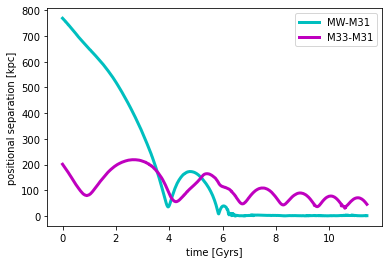

In [112]:
# Plot the Orbit of the galaxies 
#################################

plt.plot(M31_t, MW_M31_diff_pos,color='c', linewidth = 3, label='MW-M31')
plt.plot(M31_t, M33_M31_diff_pos,color='m', linewidth=3, label='M33-M31')
plt.ylabel('positional separation [kpc]')
plt.xlabel('time [Gyrs]')

plt.legend()

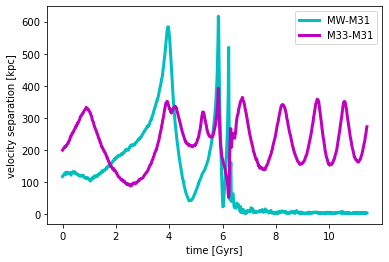

In [113]:
# Plot the orbital velocities of the galaxies 
#################################
plt.plot(M31_t, MW_M31_diff_vel,color='c', linewidth = 3, label='MW-M31')
plt.plot(M31_t, M33_M31_diff_vel,color='m', linewidth=3, label='M33-M31')
plt.ylabel('velocity separation [kpc]')
plt.xlabel('time [Gyrs]')
plt.legend()

# questions

1. How many close encounters will the MW and M31 experience in the future?
- they will have 2 close encounters.

2. How is the time evolution of the separation and relative velocity related?
- we see that at the points where the galaxies are closest, their velocities are the fastest.

3. When do M31 and the MW merge? (you might need to zoom in on the plot - try a log y axis). What happens to M33’s orbit when they merge?
- around 6.3 Gyrs they merge, at the same time there is a little dip in M33's separation from M31,
and its orbit gets smaller

4. BONUS: what is roughly the decay rate of M33’s orbit after 6 Gyr (ratio of the difference between two successive apocenters and the orbital period; you don’t need to be precise). If this rate is constant, how long will it take M33 to merge with the combined MW+M31 remnant if it is at a distance of 75 kpc?

- 10kpc/Gyrs
- 75kpc/10kpc/Gyrs == It will take 7.5 Gyrs for M33 to merge after 6 Gyrs

